In [1]:
## Import libraries & Packages

# Data structure and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import colorsys
%matplotlib inline

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
########## Useful functions ##########

## Functions for visualizations

# Generating 'N' random colors. eg) gen_colors(5) will generate 5 random colors.
def gen_colors(N):
    HSV_tuples = [(x*1.0/N, 0.5, 0.5) for x in range(N)]
    RGB_tuples = map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples)
    return [*RGB_tuples]
    
# def gen_colors_2(N):    
#     colorpools = ['lightcoral', 'gold', 'green', 'Chartreuse','Lime Green', 'Khaki', 'Aquamarine', 'Dark Slate Blue']
#     a, b = N//8, N%8  
#     if a == 0:
#         return colorpools[0:b]
#     else:
#         return colorpools + gen_colors(N%8)

    

# Generating a pie chart with the 'input' series with the 'title' on the axis 'ax'. 
# eg) pie_chart_count(titanic_df.Pclass, 'Pclass', ax1)
# It counts the number of each class in the input category and shows it by percentage.
def pie_chart_count(input, title, ax):
    num = len(set(input))
    categories = list(set(input))
    labels = [str(x) for x in categories]
    categories_ratio = [j for j in input.groupby(input).size()] 
    colors = gen_colors(num)
    ax.set_title('Counts of different ' + title +'es')
    return ax.pie(categories_ratio, labels=labels, 
                   colors=colors, autopct='%1.1f%%', startangle=90)

# Generating a pie chart with the 'input' series on the axis 'ax'. 
# eg) pie_chart_avg(Pclass_surv_mean, ax2)
# It shows the survival rate of each class in the input category.
def pie_chart_avg(input, ax):
    num = len(input)
    title = input.index.name
    categories_ratio = [j for j in input.Survived] # 산 사람 중 여자 얼마 남자 얼마 
    colors = gen_colors(num)
    ax.set_title('Survival ratio by each class of ' + title)
    return ax.pie(categories_ratio, labels=input.index, 
                   colors=colors, autopct='%1.1f%%', startangle=90)

def bar_chart_avg(input, ax):
    num = len(input)
    title = input.index.name
    colors = gen_colors(num)
    conv_input = input.copy()
    conv_input[input.index.name] = input.index
    ax.set_title('Survival rate per each class of ' + title)
    ax.set_ylim([0,1])
    return sns.barplot(title, 'Survived', data = conv_input, ax = ax, palette = colors)

# Combining pie_chart_count and pie_chart_avg (** made separate functions for occasional seperate usage)
# eg) pie_chart('Pclass')
# It shows the count and survival of the input category in a pie chart format.
def pie_chart(input):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 5))
    pie_chart_count(titanic_df[input], input, ax1)
    surv_mean_per = titanic_df[[input, 'Survived']].groupby(input, as_index = True).mean()
    surv_mean_by = titanic_df[[input, 'Survived']].groupby(input, as_index = True).sum()
    pie_chart_avg(surv_mean_by, ax2)
    bar_chart_avg(surv_mean_per, ax3)
    


# Generating a feature scaler (MinMaxScaler)
MMS = MinMaxScaler((0,10), False)    

# This function applies MMS feature scaling and plot the before and after of the input series.
# MMS_and_Plot(titanic_df, 'Fare')
def MMS_and_Plot(df, title):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (20,5))
    ax1.set_title(title + ' before feature scaling')
    ax2.set_title(title + ' after feature scaling')
    ax1.hist(df[title], bins = 40, color = 'skyblue')
    MMS.fit_transform(df[title]) 
    ax2.hist(df[title], bins = 40, color = 'salmon')

# Replace the string values to dummies
# eg) replace_w_dummies(titanic_df, 'Sex')
def replace_w_dummies(df, title):
    dummies = pd.get_dummies(df[title])
    df.drop(title, axis = 1, inplace = True)
    df = df.join(dummies)
    return df

In [3]:
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
titanic_df.info()
print('---------------------------------')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
titanic_df.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis = 1, inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
test_df.drop(['Ticket', 'Cabin', 'Name'], axis = 1, inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


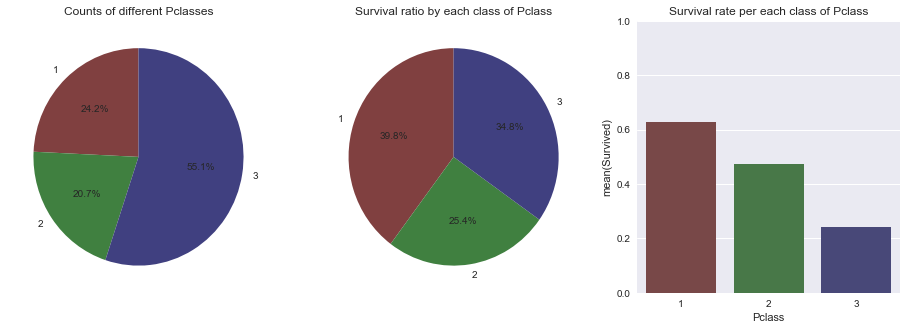

In [9]:
# Pclass

# Visualization
pie_chart('Pclass')
titanic_df.drop('Pclass', axis = 1, inplace = True)
# Pclass information will be similar to Fare
test_df.drop('Pclass', axis = 1, inplace = True)

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.p

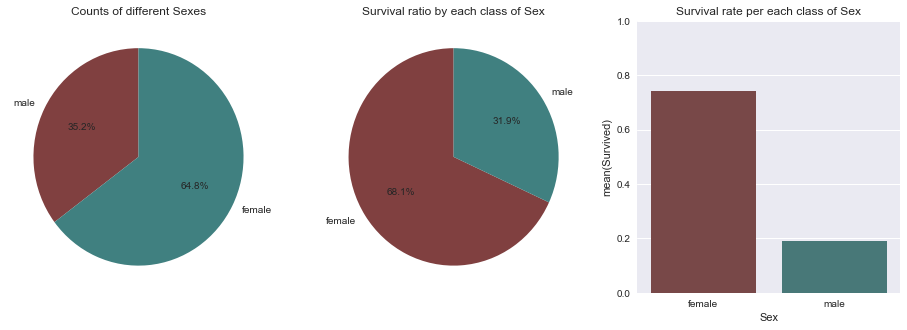

In [10]:
# Sex

# Visualization
pie_chart('Sex')

# # Replace with dummies  
# titanic_df = replace_w_dummies(titanic_df, 'Sex')
# test_df = replace_w_dummies(test_df, 'Sex')

titanic_df.Sex[titanic_df.Sex == 'male'] = 1
titanic_df.Sex[titanic_df.Sex == 'female'] = 2
test_df.Sex[test_df.Sex == 'male'] = 1
test_df.Sex[test_df.Sex == 'female'] = 2
# titanic_df.Sex



/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


The average age of each age agroup is [2.5, 10, 20, 30, 40, 50, 60, 75] 
and the average survival rate of each group is ['0.59', '0.36', '0.36', '0.41', '0.34', '0.40', '0.24', '0.12']


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape you

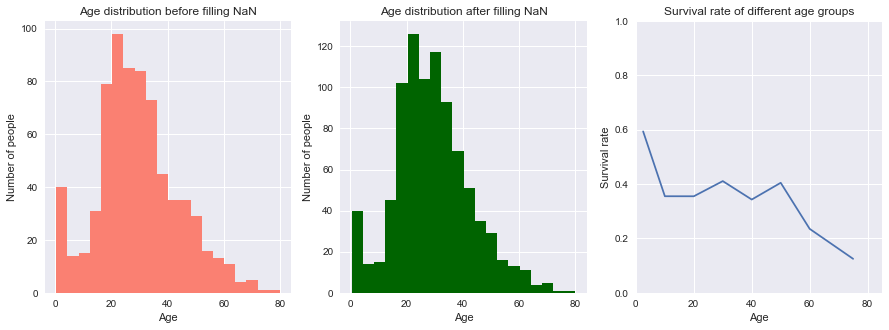

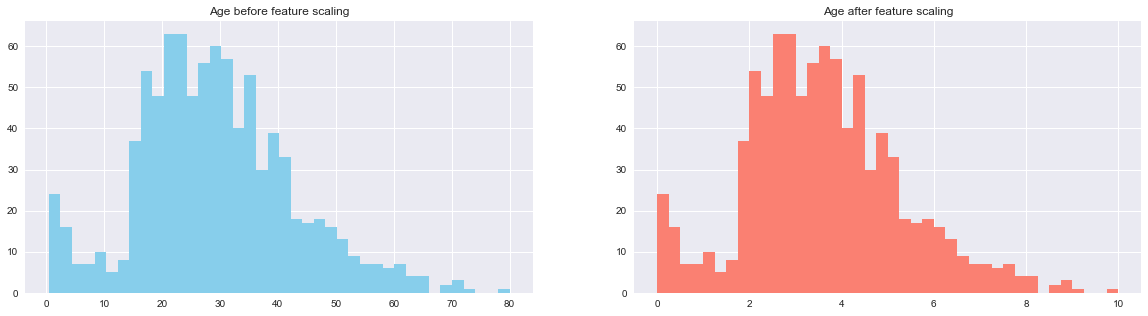

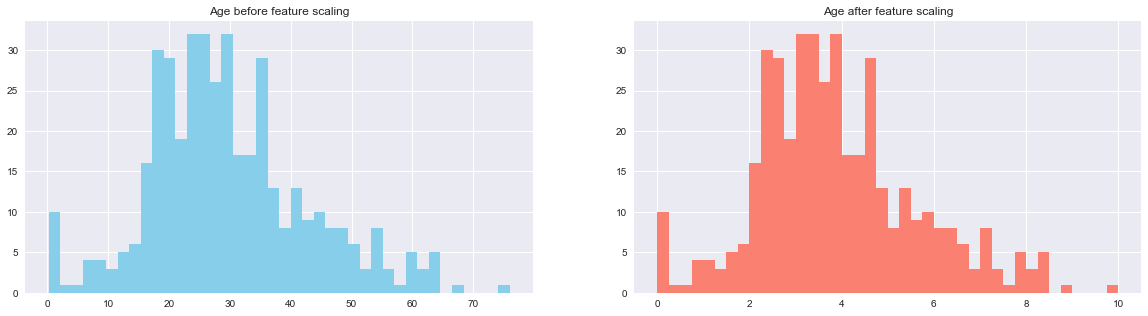

In [11]:
##### Age #####

## Check the distribution of the ages before and after filling NAN

# Before filling NAN
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
ax1.set_title('Age distribution before filling NaN')
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of people')
titanic_df.Age.hist(bins = 20, ax = ax1, color = 'salmon')

# Fill NAN and visualize the distribution
def Age_fill_na(df):
    size = df.Age.isnull().sum()
    Age_mean, Age_std = titanic_df.Age.mean(), titanic_df.Age.std()
    random_ages = np.random.randint(Age_mean - Age_std, Age_mean + Age_std, size)
    df.Age[df.Age.isnull()] = random_ages

Age_fill_na(titanic_df)
Age_fill_na(test_df)

ax2.set_title('Age distribution after filling NaN')
ax2.set_xlabel('Age')
ax2.set_ylabel('Number of people')
titanic_df.Age.hist(bins = 20, ax = ax2, color = 'darkgreen')

## Check the relation between age and survival rate, visualize it.

# age_groups = [2.5, 10, 20, 30, ..., 60, 75], each number represents the average age value of each group
# 10 years interval except for kids and elderly, kids age difference may mean a lot, elderly above 60y may not.

age_groups = [10*x for x in range(7)]
# surv_mean_per_age  = [titanic_df.Survived[titanic_df.Age <= 5].mean()]
# surv_std_per_age = [titanic_df.Survived[titanic_df.Age <= 5].std()]
# surv_num_per_age = [titanic_df.Survived[titanic_df.Age <= 5].sum()]
  
surv_mean_per_age, surv_std_per_age,surv_num_per_age = [],[],[]
for a in age_groups:
    surv_mean_per_age += [titanic_df.Survived[(titanic_df.Age <= a+10) & (titanic_df.Age > a)].mean()]
    surv_std_per_age += [titanic_df.Survived[(titanic_df.Age <= a+10) & (titanic_df.Age > a)].std()]
    surv_num_per_age += [titanic_df.Survived[(titanic_df.Age <= a+10) & (titanic_df.Age > a)].sum()]

age_groups = [2.5] + age_groups[1:] + [75]
surv_mean_per_age += [titanic_df.Survived[(titanic_df.Age <= 85) & (titanic_df.Age > 65)].mean()]
# surv_std_per_age += [titanic_df.Survived[(titanic_df.Age <= 85) & (titanic_df.Age > 65)].std()]
# surv_num_per_age += [titanic_df.Survived[(titanic_df.Age <= 85) & (titanic_df.Age > 65)].sum()]
# surv_serr_per_age = zip(surv_std_per_age, [np.sqrt(x) for x in surv_num_per_age])
# serr = [a/b for a,b in surv_serr_per_age] # standard error for each age group

print('The average age of each age agroup is {} \nand the average survival rate of each group is {}'
      .format(age_groups, [ '%.2f' %s for s in surv_mean_per_age]))
ax3.set_title('Survival rate of different age groups')
ax3.set_ylim([0,1])
ax3.set_xlim([0,85])
ax3.set_xlabel('Age')
ax3.set_ylabel('Survival rate')
ax3.plot(age_groups, surv_mean_per_age)


# Feature scaling
MMS_and_Plot(titanic_df, 'Age')
MMS_and_Plot(test_df, 'Age')

0 45 200
1 6 10


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


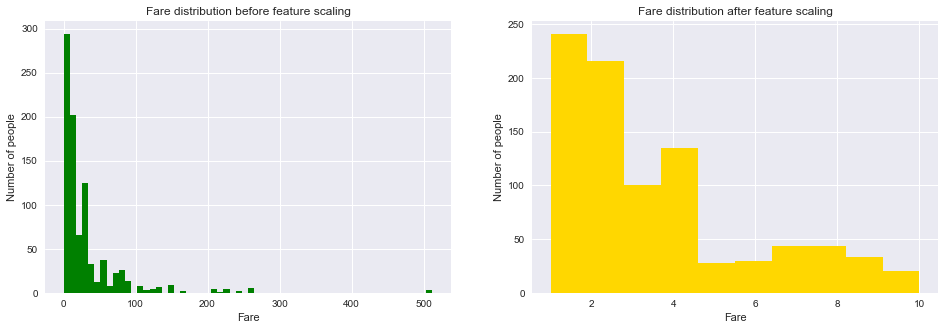

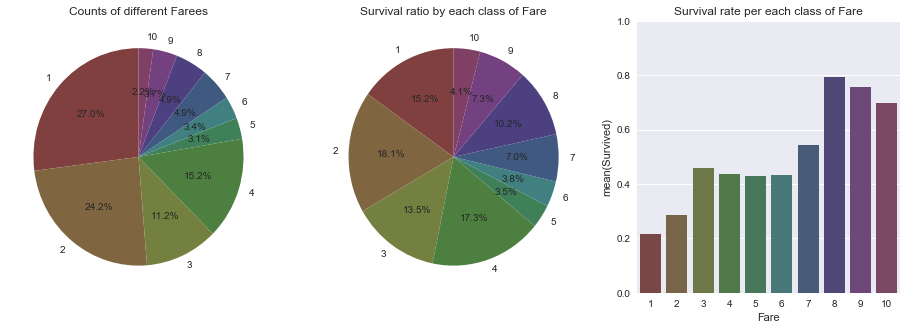

In [12]:
# Fare 

# Fill NAN in test_df
test_df.Fare.fillna(test_df.Fare.mean(), inplace = True)


f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
ax1.set_title('Fare distribution before feature scaling')
ax1.set_xlabel('Fare')
ax1.set_ylabel('Number of people')
ax1.hist(titanic_df.Fare, bins = 60, color = 'green')

# Feature scale the Fare using customized feature scale function -
# as the distribution of fare is very uneven and the variance is also huge.

fare_groups = [0, 8] + [10*x+5 for x in range(1, 6)] +[75, 100, 200]
num_groups = [str(x+1) for x in range(10)]
print(fare_groups[0], fare_groups[5], fare_groups[9])
print(num_groups[0], num_groups[5], num_groups[9])
def Fare_feature_scale(df):
    for f in range(9):  
        df.Fare[(df.Fare >= fare_groups[f]) & (df.Fare < fare_groups[f+1]) ] = fare_groups[f]
    df.Fare[df.Fare >= fare_groups[9]] = fare_groups[9]
    for f in range(10):
        df.Fare[df.Fare == fare_groups[f]] = num_groups[f]
    df.Fare = df.Fare.astype('int')

Fare_feature_scale(titanic_df)    
Fare_feature_scale(test_df)    

ax2.set_title('Fare distribution after feature scaling')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Number of people')
ax2.hist(titanic_df.Fare, bins = 10, color = 'gold')


pie_chart('Fare')

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.p

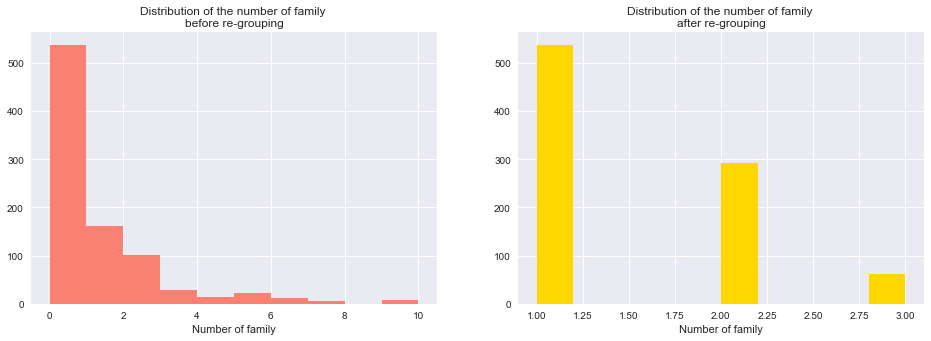

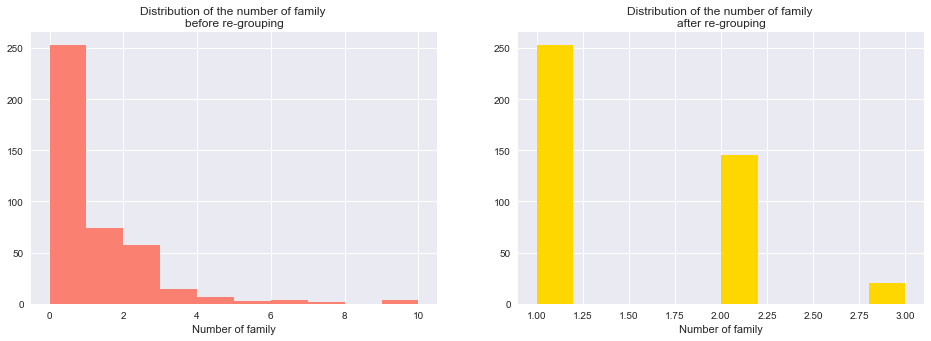

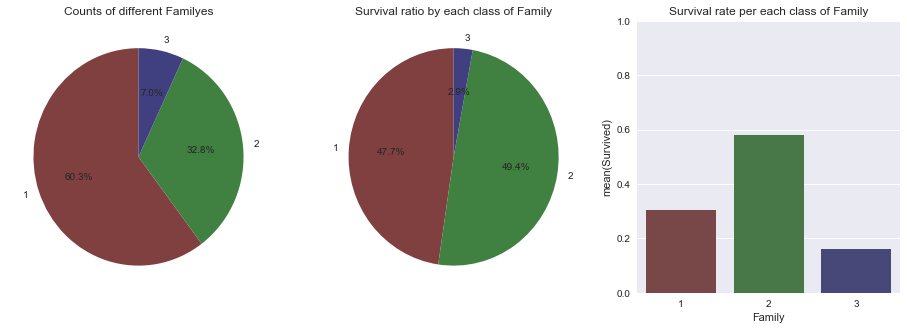

In [13]:
# Family



# Sibling, Spouse, Parents, and children are all combined in Family category
# Simplify into 3 groups: Alone, family less than 3, family more than 3
def Family(df):
    f, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
    df['Family'] = df.SibSp + df.Parch
    ax1.hist(df.Family, color = 'salmon')
    ax1.set_title('Distribution of the number of family \nbefore re-grouping')
    ax1.set_xlabel('Number of family')
    df.drop(['SibSp', 'Parch'], axis = 1, inplace = True)
    df.Family[(df.Family > 1) & (df.Family <= 3)] , df.Family[df.Family > 4]  = 1,4
    df.Family[df.Family == 4] = 3
    df.Family[df.Family == 1] = 2 
    df.Family[df.Family == 0] = 1  
    
    ax2.hist(df.Family, color = 'gold')
    ax2.set_title('Distribution of the number of family \nafter re-grouping')
    ax2.set_xlabel('Number of family')

Family(titanic_df)
Family(test_df)

pie_chart('Family')

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/ipykernel/__main__.py:9

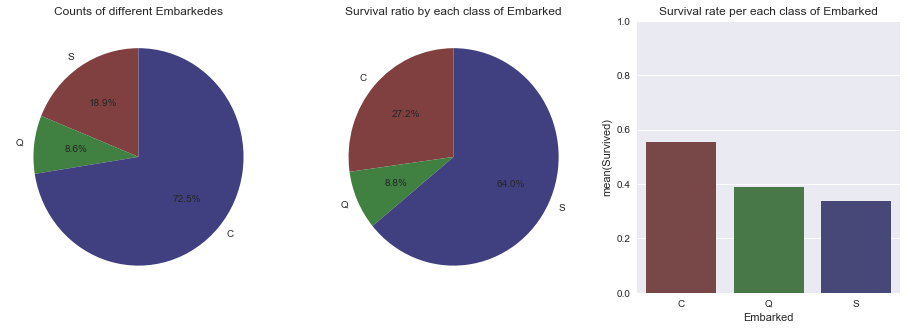

In [14]:
# Embarked

fill_value = titanic_df.Embarked.value_counts().idxmax()
titanic_df.Embarked.fillna(fill_value, inplace = True)
pie_chart('Embarked')
titanic_df.Embarked[titanic_df.Embarked =='C'] = 1
titanic_df.Embarked[titanic_df.Embarked =='S'] = 2
titanic_df.Embarked[titanic_df.Embarked =='Q'] = 3
test_df.Embarked[test_df.Embarked =='C'] = 1
test_df.Embarked[test_df.Embarked =='S'] = 2
test_df.Embarked[test_df.Embarked =='Q'] = 3
# titanic_df.Embarked

In [15]:
titanic_df.info()
print('_______________________________________')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Survived    891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
Fare        891 non-null int64
Embarked    891 non-null object
Family      891 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 41.8+ KB
_______________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
PassengerId    418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
Fare           418 non-null int64
Embarked       418 non-null object
Family         418 non-null int64
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


In [16]:
titanic_df.head(n = 15)

,Survived,Sex,Age,Fare,Embarked,Family
0,0,1,2.711737,1,2,2
1,1,2,4.722292,7,1,2
2,1,2,3.214375,1,2,1
3,1,2,4.345313,6,2,2
4,0,1,4.345313,2,2,1
5,0,1,5.099271,2,3,1
6,0,1,6.732847,6,2,1
7,0,1,0.198542,3,2,3
8,1,2,3.340035,2,2,2
9,1,2,1.706459,4,1,2


In [17]:
test_df.head(n = 15)

,PassengerId,Sex,Age,Fare,Embarked,Family
0,892,1,4.527232,1,3,1
1,893,2,6.175656,1,2,2
2,894,1,8.153765,2,3,1
3,895,1,3.538178,2,2,1
4,896,2,2.878808,2,2,2
5,897,1,1.823816,2,2,1
6,898,2,3.933799,1,3,1
7,899,1,3.406304,4,2,2
8,900,2,2.351312,1,1,1
9,901,1,2.746934,3,2,2


In [18]:
# Polynomial features

def add_poly(df):
    df['Sex2'] = df['Sex']* df['Sex'].values
    df['Age2'] = df['Age']* df['Age'].values
    df['Fare2'] = df['Fare']*df['Fare'].values
    df['Family2'] = df['Family']*df['Family'].values
    df['Sex_Age'] = df['Sex'] * df['Age'].values
    df['Sex_Fare'] = df['Sex'] * df['Fare'].values
    df['Sex_Fam'] = df['Sex'] * df['Family'].values
    df['Sex_Age'] = df['Sex'] * df['Age'].values
    df['Age--Fare'] = df['Age'] / df['Fare'].values
    return df

titanic_df = add_poly(titanic_df)
test_df = add_poly(test_df)

In [19]:
titanic_df.head()

,Survived,Sex,Age,Fare,Embarked,Family,Sex2,Age2,Fare2,Family2,Sex_Age,Sex_Fare,Sex_Fam,Age--Fare
0,0,1,2.711737,1,2,2,1,7.353515,1,4,2.71174,1,2,2.711737
1,1,2,4.722292,7,1,2,4,22.300042,49,4,9.44458,14,4,0.674613
2,1,2,3.214375,1,2,1,4,10.332210,1,1,6.42875,2,2,3.214375
3,1,2,4.345313,6,2,2,4,18.881744,36,4,8.69063,12,4,0.724219
4,0,1,4.345313,2,2,1,1,18.881744,4,1,4.34531,2,1,2.172656


In [20]:
titanic_df.describe()

,Survived,Age,Fare,Family,Age2,Fare2,Family2,Age--Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,3.656112,3.355780,1.466891,16.251761,17.497194,2.539843,1.762052
std,0.486592,1.699366,2.498588,0.623305,14.290798,24.456720,2.244428,1.389132
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,2.586077,1.000000,1.000000,6.687794,1.000000,1.000000,0.740764
50%,0.000000,3.465695,2.000000,1.000000,12.011041,4.000000,1.000000,1.400478
75%,1.000000,4.596632,4.000000,2.000000,21.129029,16.000000,4.000000,2.509110
max,1.000000,10.000000,10.000000,3.000000,100.000000,100.000000,9.000000,9.246042


In [21]:
test_df.describe()

,PassengerId,Age,Fare,Family,Age2,Fare2,Family2,Age--Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,3.900831,3.413876,1.442584,18.196864,18.571770,2.423445,1.818339
std,120.810458,1.728447,2.633213,0.585848,15.704445,26.571218,2.041565,1.319689
min,892.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,996.250000,2.746934,1.000000,1.000000,7.545646,1.000000,1.000000,0.827729
50%,1100.500000,3.670051,2.000000,1.000000,13.469278,4.000000,1.000000,1.439404
75%,1204.750000,4.774496,4.000000,2.000000,22.796623,16.000000,4.000000,2.615060
max,1309.000000,10.000000,10.000000,3.000000,100.000000,100.000000,9.000000,6.439404


In [22]:
# define training and testing sets

Y = titanic_df['Survived']
X = titanic_df.drop('Survived', axis=1) 
X_train, X_cv, Y_train, Y_cv = train_test_split(X, Y, test_size=0.3, random_state=42)

X_test  = test_df.drop("PassengerId",axis=1).copy()


In [23]:
# validation test & Learning curve

def valid_test(model, param, param_candidates):
    
    # candidates = np.logspace(-7, 7, 10) # for alpha, C 
    # candidates = [1,2,3,4,5,6,7,8,9,10]# for integers
    train_scores, valid_scores = validation_curve(model, X_cv, Y_cv, param, param_candidates)
    avg_ts, avg_vs = train_scores.mean(axis = 1), valid_scores.mean(axis = 1)
    sd_ts, sd_vs = train_scores.std(axis = 1), valid_scores.std(axis = 1)
    vs_max_ix = np.argmax(avg_vs)
    best = param_candidates[vs_max_ix]
    print('The best {} value for {} is {}'.format(param, model, best))
    plt.figure()
    plt.title('Validation Test')
    plt.ylabel('Scores')
    plt.xlabel('Candidate {} index'.format(param))
    plt.plot(range(10), avg_ts, label = 'Training Scores')
    plt.plot(range(10), avg_vs, label = 'Cross validation Scores')
    plt.legend(loc = 'best')
    return best

def Learning_curve(model):
    train_sizes = [50,100,150,200,250,300,350,400]
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, Y_train, train_sizes=train_sizes)   
    train_scores_mean, test_scores_mean = train_scores.mean(axis = 1), test_scores.mean(axis = 1)
    train_scores_std, test_scores_std = train_scores.std(axis = 1), test_scores.std(axis = 1)
    plt.figure()
    plt.title('Learning curve')
    plt.ylabel('Scores')
    plt.xlabel('Training Set')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc = 'best')
    plt.show()

The best C value for LogisticRegression(C=10000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False) is 215.44346900318865


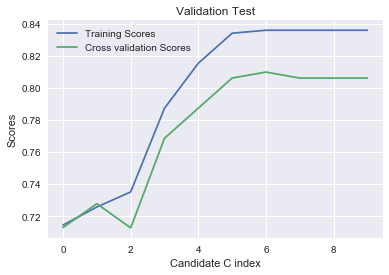

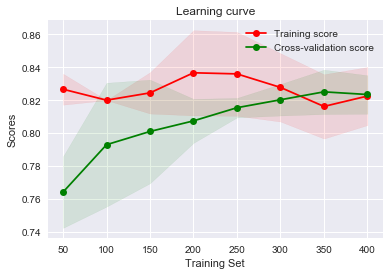

Train score is 0.8298555377207063
Cross validation score is 0.8059701492537313


In [24]:
# Logistic Regression

best_C = valid_test(LogisticRegression(), "C", np.logspace(-7, 7, 10))
LR = LogisticRegression(C = best_C)
Learning_curve(LR)
LR.fit(X_train, Y_train)
Y_test_pred_LR = LR.predict(X_test)
print('Train score is {}'.format(LR.score(X_train, Y_train)))
print('Cross validation score is {}'.format(LR.score(X_cv, Y_cv)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", LR)])
# Learning_curve(pipeline)
# # Learning_curve(LR)

# pipeline.fit(X_train, Y_train)
# Y_test_pred_LR = pipeline.predict(X_test)
# print('Train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('Cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged y

The best alpha value for MLPClassifier(activation='relu', alpha=0.10000000000000001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) is 0.03593813663804626


/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)
/Users/HyesooYoun/anaconda/envs/py3k/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged y

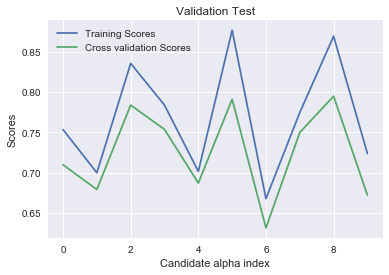

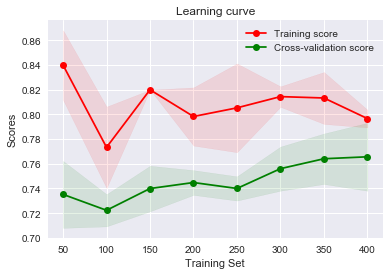

train score is 0.7945425361155698
cross validation score is 0.7798507462686567


In [25]:
# Neural networking (MLP)
best_alpha = valid_test(MLPClassifier(), 'alpha', np.logspace(-5, -1, 10))
MLP = MLPClassifier(alpha=best_alpha, hidden_layer_sizes=(10, 10, 10), random_state=1, max_iter=200)
MLP.fit(X_train, Y_train)
Learning_curve(MLP)
Y_test_pred_MLP = MLP.predict(X_test)

print('train score is {}'.format(MLP.score(X_train, Y_train)))
print('cross validation score is {}'.format(MLP.score(X_cv, Y_cv)))

# polynomial_features = PolynomialFeatures(degree=2,include_bias=False)
# pipeline = Pipeline([("polynomial_features", polynomial_features), ("MLP_Classifier", MLP)])
# pipeline.fit(X_train, Y_train)
# Learning_curve(pipeline)
# Y_test_pred_MLP = MLP.predict(X_test)

# print('train score is {}'.format(pipeline.score(X_train, Y_train)))
# print('cross validation score is {}'.format(pipeline.score(X_cv, Y_cv)))

The best gamma value for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=100000.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) is 0.021544346900318846
The best C value for SVC(C=100000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.021544346900318846,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False) is 3.593813663804626


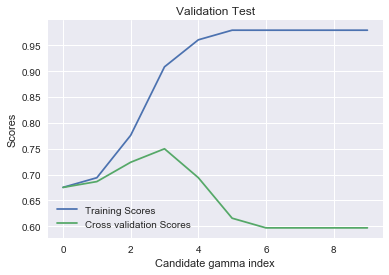

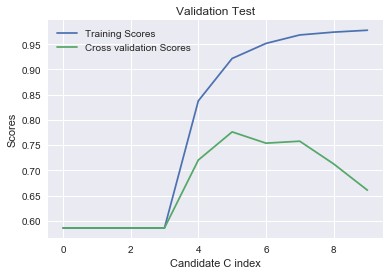

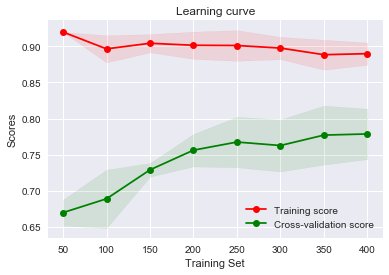

train score is 0.8764044943820225
cross validation score is 0.7761194029850746


In [26]:
# Support Vector Machines
best_gamma = valid_test(SVC(), "gamma", np.logspace(-5, 5, 10))
best_C = valid_test(SVC(gamma = best_gamma), "C", np.logspace(-5, 5, 10))
svm = SVC(C = best_C, gamma = best_gamma)
svm.fit(X_train, Y_train)
Learning_curve(svm)
Y_test_pred_svm = svm.predict(X_test)
print('train score is {}'.format(svm.score(X_train, Y_train)))
print('cross validation score is {}'.format(svm.score(X_cv, Y_cv)))

In [27]:
submission = pd.DataFrame({"PassengerId": test_df["PassengerId"],"Survived": Y_test_pred_svm})
submission.to_csv('titanic_4.csv', index=False)